In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
#!pip3 install pandas-profiling==3.1.0
!pip install catboost

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
sampleSubmission = pd.read_csv('sampleSubmission.csv')
df_train.head(40)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


In [ ]:
df_train.shape, df_test.shape

((360691, 9), (560877, 7))

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360691 entries, 0 to 360690
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       360691 non-null  object 
 1   Category    360691 non-null  object 
 2   Descript    360691 non-null  object 
 3   DayOfWeek   360690 non-null  object 
 4   PdDistrict  360690 non-null  object 
 5   Resolution  360690 non-null  object 
 6   Address     360690 non-null  object 
 7   X           360690 non-null  float64
 8   Y           360690 non-null  float64
dtypes: float64(2), object(7)
memory usage: 24.8+ MB


In [ ]:
df_train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     1
PdDistrict    1
Resolution    1
Address       1
X             1
Y             1
dtype: int64

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560877 entries, 0 to 560876
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          560877 non-null  int64  
 1   Dates       560877 non-null  object 
 2   DayOfWeek   560877 non-null  object 
 3   PdDistrict  560877 non-null  object 
 4   Address     560877 non-null  object 
 5   X           560877 non-null  float64
 6   Y           560876 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 30.0+ MB


In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile_final = ProfileReport(df_train, title="Crimes", explorative=True, minimal=True)

In [ ]:
profile_final.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_train.head(3)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414


In [ ]:
df_train.describe()

,X,Y
count,360690.000000,360690.000000
mean,-122.422742,37.767536
std,0.025458,0.023965
min,-122.513642,37.707922
25%,-122.433301,37.753565
50%,-122.416330,37.775421
75%,-122.406592,37.784479
max,-122.365241,37.819975


In [ ]:
df_test.head(3)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212


In [ ]:
df_test.describe()

,Id,X,Y
count,560877.000000,560877.000000,560876.000000
mean,280438.000000,-122.422687,37.767320
std,161911.387803,0.025353,0.024068
min,0.000000,-122.513642,37.707879
25%,140219.000000,-122.432952,37.753027
50%,280438.000000,-122.416262,37.775421
75%,420657.000000,-122.406775,37.784401
max,560876.000000,-122.000000,37.820621


In [ ]:
df_train['PdDistrict'].unique()

array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN', nan], dtype=object)

In [ ]:
df_train['Resolution'].unique()

array(['ARREST, BOOKED', 'NONE', 'ARREST, CITED', 'PSYCHOPATHIC CASE',
       'JUVENILE BOOKED', 'UNFOUNDED', 'EXCEPTIONAL CLEARANCE', 'LOCATED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'NOT PROSECUTED',
       'JUVENILE DIVERTED', 'COMPLAINANT REFUSES TO PROSECUTE',
       'JUVENILE ADMONISHED', 'JUVENILE CITED',
       'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
       'PROSECUTED BY OUTSIDE AGENCY', 'PROSECUTED FOR LESSER OFFENSE',
       nan], dtype=object)

In [ ]:
df_train['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [ ]:
df_train['DayOfWeek'].unique()

array(['Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday',
       'Thursday', nan], dtype=object)

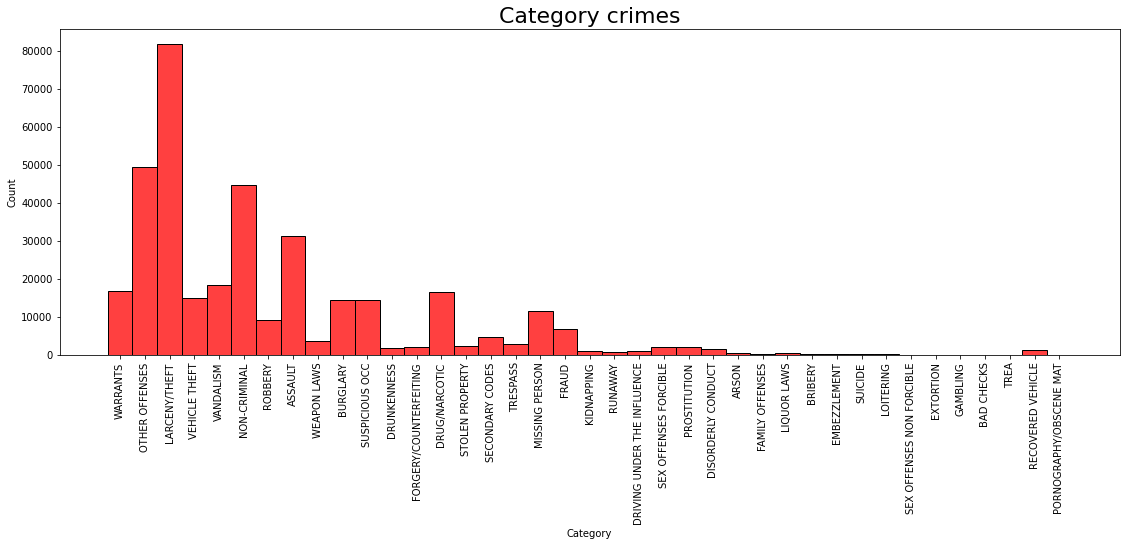

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(19, 6))
sns.histplot(x='Category', data=df_train, palette='Paired', ax=ax, color = 'red')
ax.tick_params(axis='x', rotation=90)
plt.title("Category crimes", fontsize=22)
plt.show()

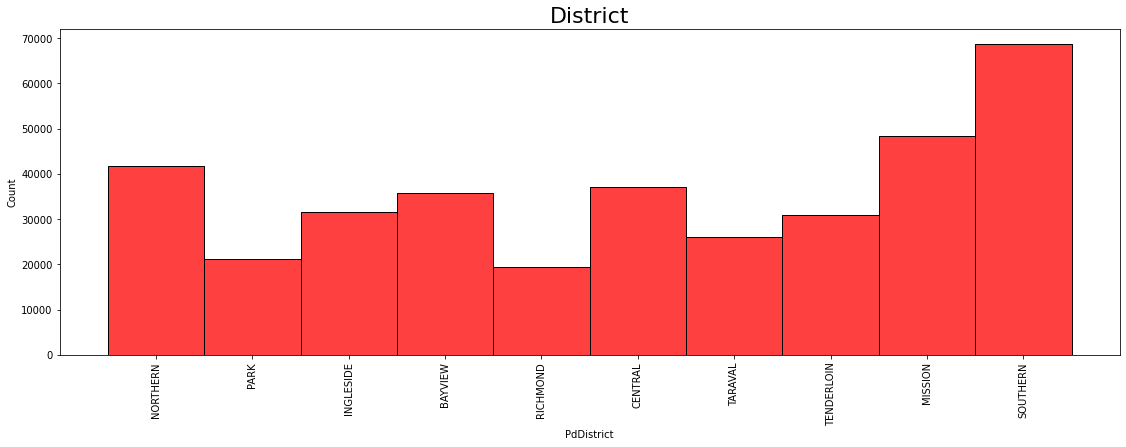

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(19, 6))
sns.histplot(x='PdDistrict', data=df_train, palette='Paired', ax=ax, color = 'red')
ax.tick_params(axis='x', rotation=90)
plt.title("District", fontsize=22)
plt.show()

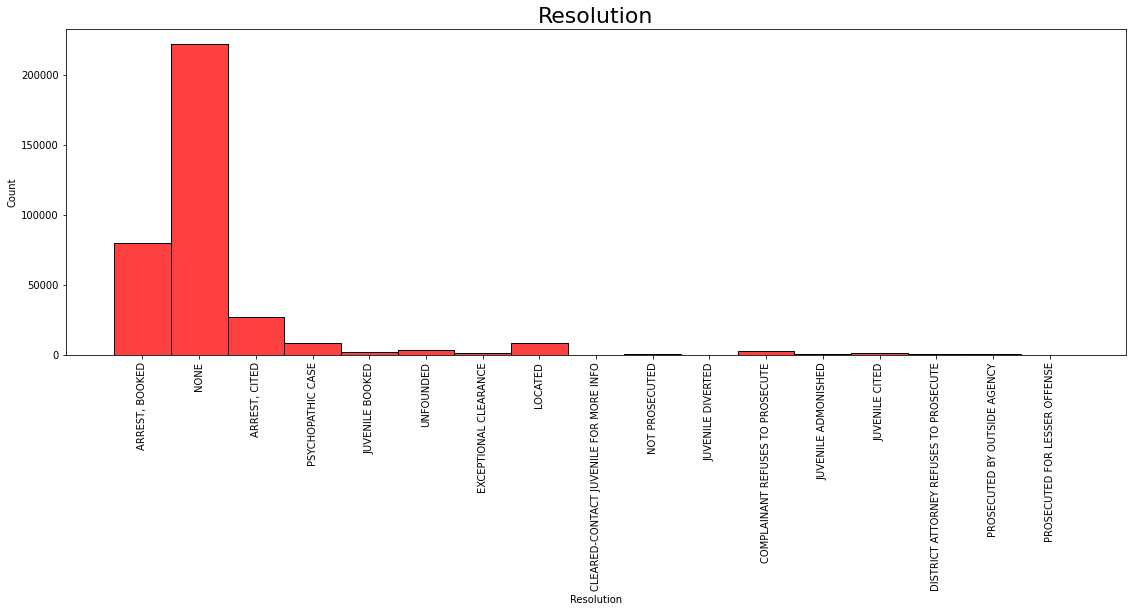

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(19, 6))
sns.histplot(x='Resolution', data=df_train, palette='Paired', ax=ax, color = 'red')
ax.tick_params(axis='x', rotation=90)
plt.title("Resolution", fontsize=22)
plt.show()

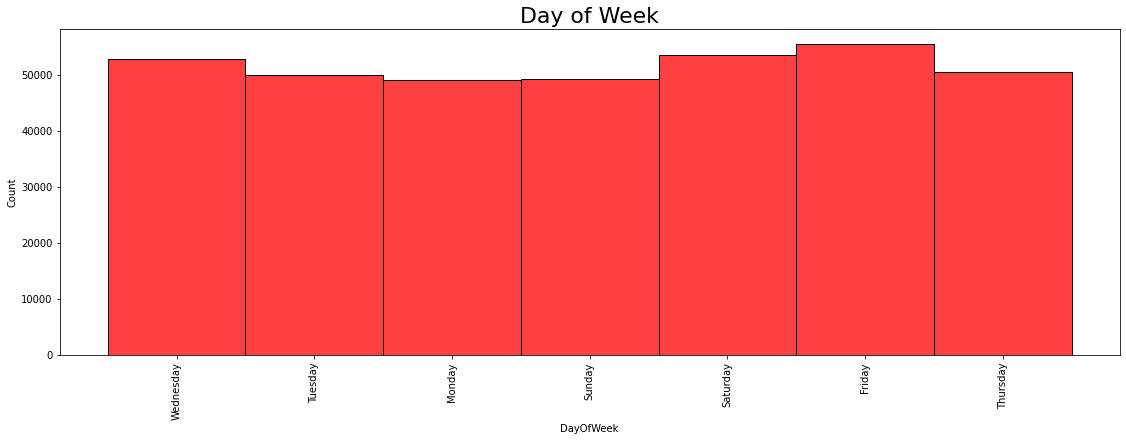

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(19, 6))
sns.histplot(x='DayOfWeek', data=df_train, palette='Paired', ax=ax, color = 'red')
ax.tick_params(axis='x', rotation=90)
plt.title("Day of Week", fontsize=22)
plt.show()

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


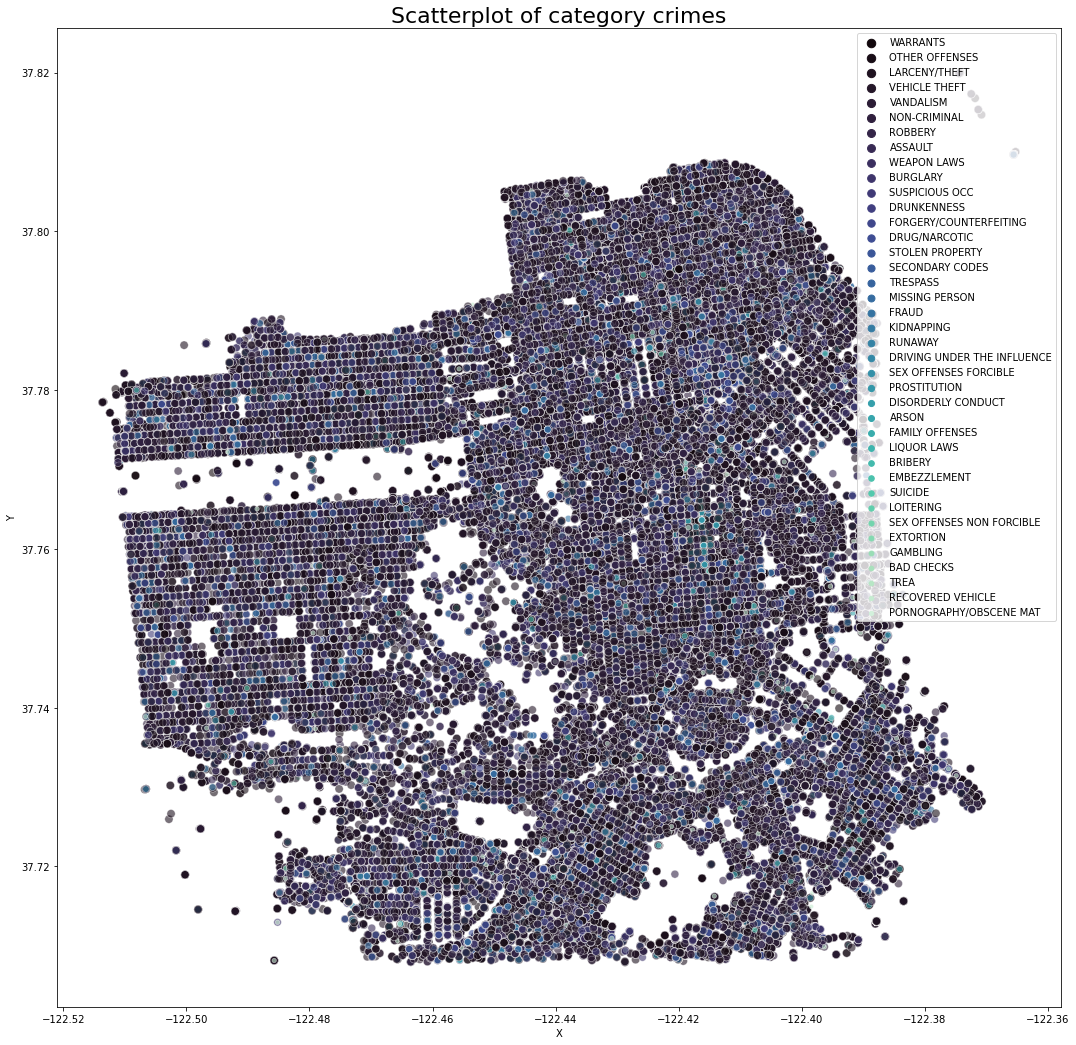

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(18, 18))
sns.scatterplot(data=df_train, x='X', y='Y', alpha=0.6, palette='mako', 
                hue='Category', size='Category')
plt.title("Scatterplot of category crimes", fontsize=22)
plt.legend()

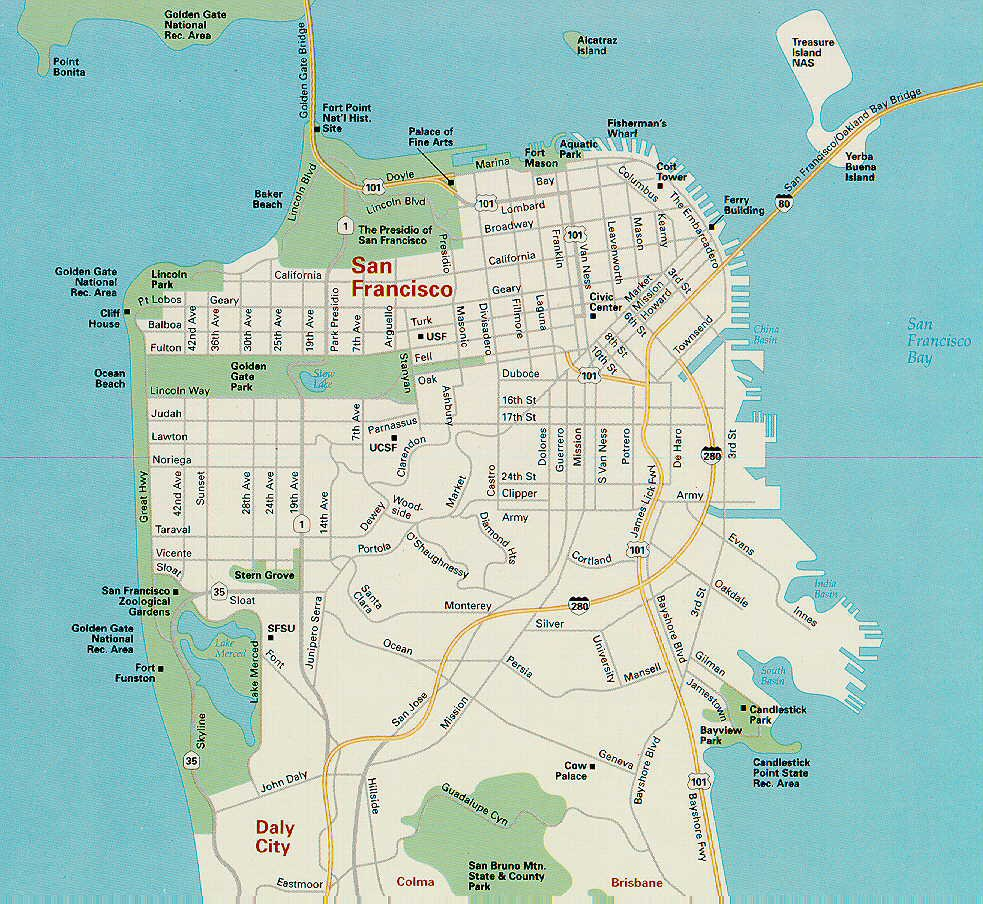

In [ ]:
display(Image('2243.jpg'))

In [ ]:
sampleSubmission.columns

Index(['Id', 'ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC',
       'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES',
       'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING',
       'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON',
       'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT',
       'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY',
       'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE',
       'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS',
       'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS'],
      dtype='object')

In [2]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
df_train_fit = pd.read_csv('train.csv')
df_test_fit = pd.read_csv('test.csv')

In [4]:
df_train_fit = df_train_fit.drop(['Descript', 'Resolution'], axis= 1)

df_train_fit['Dates'] = pd.to_datetime(df_train_fit['Dates'])
df_train_fit["year"] = df_train_fit['Dates'].dt.year
df_train_fit["month"] = df_train_fit['Dates'].dt.month
df_train_fit["day"] = df_train_fit['Dates'].dt.day
df_train_fit["hour"] = df_train_fit['Dates'].dt.hour
df_train_fit["minute"] = df_train_fit['Dates'].dt.minute
df_train_fit["day_of_year"] = df_train_fit['Dates'].dt.day_of_year
df_train_fit["day_of_year"] = df_train_fit['Dates'].dt.is_month_start
df_train_fit

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,minute,day_of_year
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,False
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,False
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,False
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,False
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,Monday,TARAVAL,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,6,0,15,False
878045,2003-01-06 00:01:00,LARCENY/THEFT,Monday,INGLESIDE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,0,1,False
878046,2003-01-06 00:01:00,LARCENY/THEFT,Monday,SOUTHERN,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,0,1,False
878047,2003-01-06 00:01:00,VANDALISM,Monday,SOUTHERN,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,6,0,1,False


In [5]:
seve_Id = df_test_fit['Id'].copy()

In [6]:
df_test_fit = df_test_fit.drop(['Id'], axis= 1)

df_test_fit['Dates'] = pd.to_datetime(df_test_fit['Dates'])
df_test_fit["year"] = df_test_fit['Dates'].dt.year
df_test_fit["month"] = df_test_fit['Dates'].dt.month
df_test_fit["day"] = df_test_fit['Dates'].dt.day
df_test_fit["hour"] = df_test_fit['Dates'].dt.hour
df_test_fit["minute"] = df_test_fit['Dates'].dt.minute
df_test_fit["day_of_year"] = df_test_fit['Dates'].dt.day_of_year
df_test_fit["day_of_year"] = df_test_fit['Dates'].dt.is_month_start
df_test_fit

,Dates,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,minute,day_of_year
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,59,False
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,51,False
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,50,False
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,False
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,False
...,...,...,...,...,...,...,...,...,...,...,...,...
884257,2003-01-01 00:01:00,Wednesday,MISSION,2600 Block of BRYANT ST,-122.408983,37.751987,2003,1,1,0,1,True
884258,2003-01-01 00:01:00,Wednesday,NORTHERN,1900 Block of WASHINGTON ST,-122.425342,37.792681,2003,1,1,0,1,True
884259,2003-01-01 00:01:00,Wednesday,INGLESIDE,5500 Block of MISSION ST,-122.445418,37.712075,2003,1,1,0,1,True
884260,2003-01-01 00:01:00,Wednesday,BAYVIEW,1500 Block of HUDSON AV,-122.387394,37.739479,2003,1,1,0,1,True


In [7]:
df_train_fit = df_train_fit.drop(['Dates'], axis= 1)
df_test_fit = df_test_fit.drop(['Dates'], axis= 1)

In [8]:
df_train_fit

,Category,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,minute,day_of_year
0,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,False
1,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,53,False
2,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,33,False
3,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,30,False
4,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,30,False
...,...,...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,Monday,TARAVAL,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,6,0,15,False
878045,LARCENY/THEFT,Monday,INGLESIDE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,0,1,False
878046,LARCENY/THEFT,Monday,SOUTHERN,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,0,1,False
878047,VANDALISM,Monday,SOUTHERN,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,6,0,1,False


In [9]:
df_test_fit

,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,minute,day_of_year
0,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23,59,False
1,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23,51,False
2,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23,50,False
3,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,False
4,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23,45,False
...,...,...,...,...,...,...,...,...,...,...,...
884257,Wednesday,MISSION,2600 Block of BRYANT ST,-122.408983,37.751987,2003,1,1,0,1,True
884258,Wednesday,NORTHERN,1900 Block of WASHINGTON ST,-122.425342,37.792681,2003,1,1,0,1,True
884259,Wednesday,INGLESIDE,5500 Block of MISSION ST,-122.445418,37.712075,2003,1,1,0,1,True
884260,Wednesday,BAYVIEW,1500 Block of HUDSON AV,-122.387394,37.739479,2003,1,1,0,1,True


In [10]:
oe = OrdinalEncoder()
la = LabelEncoder()

In [11]:
df_train_fit['Category'] = oe.fit_transform(df_train_fit['Category'].values.reshape(-1, 1))
df_train_fit['DayOfWeek'] = oe.fit_transform(df_train_fit['DayOfWeek'].values.reshape(-1, 1))
df_train_fit['PdDistrict'] = oe.fit_transform(df_train_fit['PdDistrict'].values.reshape(-1, 1))
df_train_fit['Address'] = oe.fit_transform(df_train_fit['Address'].values.reshape(-1, 1))
df_train_fit['day_of_year'] = la.fit_transform(df_train_fit['day_of_year'])
df_train_fit

,Category,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour,minute,day_of_year
0,37.0,6.0,4.0,19790.0,-122.425892,37.774599,2015,5,13,23,53,0
1,21.0,6.0,4.0,19790.0,-122.425892,37.774599,2015,5,13,23,53,0
2,21.0,6.0,4.0,22697.0,-122.424363,37.800414,2015,5,13,23,33,0
3,16.0,6.0,4.0,4266.0,-122.426995,37.800873,2015,5,13,23,30,0
4,16.0,6.0,5.0,1843.0,-122.438738,37.771541,2015,5,13,23,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
878044,25.0,1.0,8.0,15816.0,-122.459033,37.714056,2003,1,6,0,15,0
878045,16.0,1.0,2.0,11491.0,-122.447364,37.731948,2003,1,6,0,1,0
878046,16.0,1.0,7.0,11315.0,-122.403390,37.780266,2003,1,6,0,1,0
878047,35.0,1.0,7.0,22308.0,-122.390531,37.780607,2003,1,6,0,1,0


In [12]:
y = df_train_fit['Category']
X = df_train_fit.drop(['Category'], axis= 1)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=40)

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(depth= 6, 
                           iterations= 600,
                           l2_leaf_reg= 2, 
                           learning_rate= 0.15, 
                           random_seed=63,
                           one_hot_max_size=5)
model.fit(X_train, y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))


0:	learn: 3.1506665	total: 4.19s	remaining: 41m 48s
1:	learn: 2.9825439	total: 8.03s	remaining: 40m
2:	learn: 2.8581676	total: 11.9s	remaining: 39m 30s
3:	learn: 2.7747392	total: 15.8s	remaining: 39m 17s
4:	learn: 2.7112123	total: 19.7s	remaining: 39m 1s
5:	learn: 2.6604087	total: 23.6s	remaining: 38m 51s
6:	learn: 2.6211556	total: 27.2s	remaining: 38m 25s
7:	learn: 2.5883320	total: 30.9s	remaining: 38m 7s
8:	learn: 2.5619460	total: 34.5s	remaining: 37m 47s
9:	learn: 2.5399540	total: 38.2s	remaining: 37m 31s
10:	learn: 2.5185477	total: 41.8s	remaining: 37m 19s
11:	learn: 2.5028321	total: 45.5s	remaining: 37m 9s
12:	learn: 2.4906291	total: 49.1s	remaining: 36m 58s
13:	learn: 2.4788930	total: 52.8s	remaining: 36m 48s
14:	learn: 2.4686259	total: 56.5s	remaining: 36m 44s
15:	learn: 2.4600808	total: 1m 2s	remaining: 37m 54s
16:	learn: 2.4527454	total: 1m 5s	remaining: 37m 41s
17:	learn: 2.4467155	total: 1m 9s	remaining: 37m 31s
18:	learn: 2.4415764	total: 1m 13s	remaining: 37m 21s
19:	learn

In [ ]:
df_test_fit['DayOfWeek'] = oe.fit_transform(df_test_fit['DayOfWeek'].values.reshape(-1, 1))
df_test_fit['PdDistrict'] = oe.fit_transform(df_test_fit['PdDistrict'].values.reshape(-1, 1))
df_test_fit['Address'] = oe.fit_transform(df_test_fit['Address'].values.reshape(-1, 1))
df_test_fit['day_of_year'] = la.fit_transform(df_test_fit['day_of_year'])

In [ ]:
y_pred = model.predict_proba(df_test_fit)

In [ ]:
submission = pd.DataFrame(columns=['Id'], data=seve_Id)
submission = pd.concat([submission, pd.DataFrame(y_pred, columns=["ARSON", "ASSAULT", "BAD CHECKS", "BRIBERY", "BURGLARY", "DISORDERLY CONDUCT",
"DRIVING UNDER THE INFLUENCE", "DRUG/NARCOTIC", "DRUNKENNESS", "EMBEZZLEMENT", "EXTORTION",
"FAMILY OFFENSES", "FORGERY/COUNTERFEITING", "FRAUD", "GAMBLING", "KIDNAPPING", "LARCENY/THEFT",
"LIQUOR LAWS", "LOITERING", "MISSING PERSON", "NON-CRIMINAL", "OTHER OFFENSES", "PORNOGRAPHY/OBSCENE MAT",
"PROSTITUTION", "RECOVERED VEHICLE", "ROBBERY", "RUNAWAY", "SECONDARY CODES", "SEX OFFENSES FORCIBLE",
"SEX OFFENSES NON FORCIBLE", "STOLEN PROPERTY", "SUICIDE", "SUSPICIOUS OCC", "TREA", "TRESPASS",
"VANDALISM", "VEHICLE THEFT","WARRANTS", "WEAPON LAWS"])], axis=1)
submission.head()

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,1.087569e-229,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,1.185618e-259,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,1.000000e+00,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,0.0,0.0,0.0
1,1,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,1.087569e-229,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,1.185618e-259,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,1.000000e+00,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,0.0,0.0,0.0
2,2,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,1.000000e+00,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,0.0,0.0,0.0
3,3,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.193904e-191,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.003184e-227,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,8.107528e-209,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,8.497630e-260,2.225074e-308,2.553023e-292,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,1.0,0.0,0.0
4,4,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.193904e-191,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.003184e-227,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,8.107528e-209,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,8.497630e-260,2.225074e-308,2.553023e-292,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,2.225074e-308,1.0,0.0,0.0


In [ ]:
from google.colab import files

In [ ]:
submission.to_csv("submission.csv", index=False)

In [ ]:
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>